In [1]:
from msclap import CLAP
import torch
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import pandas as pd
import os

In [19]:
kids = pd.read_csv("/bucket/data_collection/datasets/purchased_data/source_raw/datatang_children_speech/meta.csv")
kids_10k = kids.sample(1000, random_state=1)
kids_10k['class'] = 'kid'
display(kids_10k)
kids_10k['filepath'][107319]

,filepath,filename,relative_path,file_extension,dataset_origin,dataset_name,sample_rate,audio_length,file_ok,file_size,channels,filepath_enhanced,snr,class
107319,/bucket/data_collection/datasets/purchased_dat...,G00342S0080.wav,datatang_children_speech/APY221015001_200 Hour...,wav,web_free_data,datatang_children_speech,16000,6.704562,True,0.204649,1.0,/bucket/data_collection/datasets/purchased_dat...,1.781835,kid
46091,/bucket/data_collection/datasets/purchased_dat...,T0001G0052S0243.wav,datatang_children_speech/APY161101025_178 Hour...,wav,web_free_data,datatang_children_speech,44100,2.322721,True,0.195415,1.0,/bucket/data_collection/datasets/purchased_dat...,21.803018,kid
78309,/bucket/data_collection/datasets/purchased_dat...,G00905S2283.wav,datatang_children_speech/APY190422001_464 Hour...,wav,web_free_data,datatang_children_speech,16000,2.783500,True,0.084988,1.0,/bucket/data_collection/datasets/purchased_dat...,10.678621,kid
15145,/bucket/data_collection/datasets/purchased_dat...,T0001G0127S0098.wav,datatang_children_speech/APY161101025_178 Hour...,wav,web_free_data,datatang_children_speech,44100,2.229841,True,0.187603,1.0,/bucket/data_collection/datasets/purchased_dat...,18.675603,kid
99062,/bucket/data_collection/datasets/purchased_dat...,T0004G0016S0018.wav,datatang_children_speech/APY161101023_55 Hours...,wav,web_free_data,datatang_children_speech,44100,1.579683,True,0.132915,1.0,/bucket/data_collection/datasets/purchased_dat...,25.631783,kid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48283,/bucket/data_collection/datasets/purchased_dat...,T0001G0156S0035.wav,datatang_children_speech/APY161101025_178 Hour...,wav,web_free_data,datatang_children_speech,44100,2.601361,True,0.218853,1.0,/bucket/data_collection/datasets/purchased_dat...,15.758535,kid
33305,/bucket/data_collection/datasets/purchased_dat...,T1006G0195S0162.wav,datatang_children_speech/APY161101025_178 Hour...,wav,web_free_data,datatang_children_speech,44100,3.112200,True,0.261822,1.0,/bucket/data_collection/datasets/purchased_dat...,26.272666,kid
63129,/bucket/data_collection/datasets/purchased_dat...,G04210S3291.wav,datatang_children_speech/APY190422001_464 Hour...,wav,web_free_data,datatang_children_speech,16000,3.188125,True,0.097336,1.0,/bucket/data_collection/datasets/purchased_dat...,0.108635,kid
138009,/bucket/data_collection/datasets/purchased_dat...,T0008G0175S0182.wav,datatang_children_speech/APY161101039_50 Hours...,wav,web_free_data,datatang_children_speech,44100,3.248481,True,0.273317,1.0,/bucket/data_collection/datasets/purchased_dat...,27.707015,kid


'/bucket/data_collection/datasets/purchased_data/source_raw/datatang_children_speech/APY221015001_200 Hours - American Children Speech Data by Mobile Phone_20h/data/G00342/G00342S0080.wav'

In [20]:
adults = pd.read_csv("/bucket/data_collection/datasets/purchased_data/source_raw/datatang_adults_speech/meta.csv")
adults_10k = adults.sample(1000, random_state=1)
adults_10k['class'] = 'adult'
display(adults_10k)
adults_10k['filepath'][137980]

,filepath,filename,relative_path,dataset_name,length,audio_length,sample_rate,channels,folder_lang,language,class
137980,/bucket/data_collection/datasets/purchased_dat...,G10604S1171.wav,purchased_data/source_raw/datatang_adults_spee...,datatang_children_speech,57344,3.584,16000,1,dt_en_lat,lat,adult
279919,/bucket/data_collection/datasets/purchased_dat...,G33625S1039.wav,purchased_data/source_raw/datatang_adults_spee...,datatang_children_speech,79872,4.992,16000,1,dt_en_in,in,adult
130919,/bucket/data_collection/datasets/purchased_dat...,G00633S1085.wav,purchased_data/source_raw/datatang_adults_spee...,datatang_children_speech,104448,6.528,16000,1,dt_en_lat,lat,adult
212495,/bucket/data_collection/datasets/purchased_dat...,G00837S1145.wav,purchased_data/source_raw/datatang_adults_spee...,datatang_children_speech,81920,5.120,16000,1,dt_en_gb,gb,adult
122828,/bucket/data_collection/datasets/purchased_dat...,G00515S1092.wav,purchased_data/source_raw/datatang_adults_spee...,datatang_children_speech,69632,4.352,16000,1,dt_en_lat,lat,adult
...,...,...,...,...,...,...,...,...,...,...,...
162907,/bucket/data_collection/datasets/purchased_dat...,G00854S1146.wav,purchased_data/source_raw/datatang_adults_spee...,datatang_children_speech,104448,6.528,16000,1,dt_en_lat,lat,adult
167380,/bucket/data_collection/datasets/purchased_dat...,G00026S1118.wav,purchased_data/source_raw/datatang_adults_spee...,datatang_children_speech,71680,4.480,16000,1,dt_en_lat,lat,adult
105822,/bucket/data_collection/datasets/purchased_dat...,G00948S1027.wav,purchased_data/source_raw/datatang_adults_spee...,datatang_children_speech,67584,4.224,16000,1,dt_en_fr,fr,adult
113626,/bucket/data_collection/datasets/purchased_dat...,G00418S1009.wav,purchased_data/source_raw/datatang_adults_spee...,datatang_children_speech,57344,3.584,16000,1,dt_en_fr,fr,adult


'/bucket/data_collection/datasets/purchased_data/source_raw/datatang_adults_speech/audios/dt_en_lat/G10604S1171.wav'

In [21]:
#Create single df 
df = pd.concat([adults_10k[['filepath', 'class']], kids_10k[['filepath', 'class']]])
display(df)

,filepath,class
137980,/bucket/data_collection/datasets/purchased_dat...,adult
279919,/bucket/data_collection/datasets/purchased_dat...,adult
130919,/bucket/data_collection/datasets/purchased_dat...,adult
212495,/bucket/data_collection/datasets/purchased_dat...,adult
122828,/bucket/data_collection/datasets/purchased_dat...,adult
...,...,...
48283,/bucket/data_collection/datasets/purchased_dat...,kid
33305,/bucket/data_collection/datasets/purchased_dat...,kid
63129,/bucket/data_collection/datasets/purchased_dat...,kid
138009,/bucket/data_collection/datasets/purchased_dat...,kid


In [22]:
classes = df['class'].unique()

class_id_map = {name: i for i, name in enumerate(classes, 0)}
print(class_id_map)

promptv1 = 'The speaker is the age of a' #[child, adult]
promptv2 = 'The speaker is the age of' #[a child, an adult]
promptv3 = 'The speaker is the age of a' #[kid, adult]
y = [promptv1 + x for x in classes]


{'adult': 0, 'kid': 1}


In [23]:
# Load and initialize CLAP
clap_model = CLAP(version = '2023', use_cuda=True)

# Computing text embeddings
text_embeddings = clap_model.get_text_embeddings(y)

In [16]:
# Computing audio embeddings
y_preds, y_labels = [], []
print(os.getcwd())

for i in tqdm(range(len(df))):
    path, label = df.iloc[i]
    idx = class_id_map[label]
    #print(idx)
    one_hot_target = torch.nn.functional.one_hot(torch.tensor([idx]), num_classes=len(classes)+1)

    audio_embeddings = clap_model.get_audio_embeddings([path], resample=True)
    similarity = clap_model.compute_similarity(audio_embeddings, text_embeddings)

    y_pred = F.softmax(similarity.detach().cpu(), dim=1).numpy()

    y_preds.append(y_pred)
    y_labels.append(one_hot_target.detach().cpu().numpy())


/mounts/ud-data/jtaylor/a5f2c23d-7fb6-41a6-ac0c-3a2ffc02b992/data/acoustic_scene_classification/CLAP-main/examples


  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [04:14<00:00,  7.86it/s]


In [18]:
y_lab, y_pred = np.concatenate(y_labels, axis=0), np.concatenate(y_preds, axis=0)
y_label_val = np.argmax(y_lab, axis=1)
y_pred_val = np.argmax(y_pred, axis=1)
acc = accuracy_score(np.argmax(y_lab, axis=1), np.argmax(y_pred, axis=1))
print('Accuracy {}'.format(acc))

Accuracy 0.758


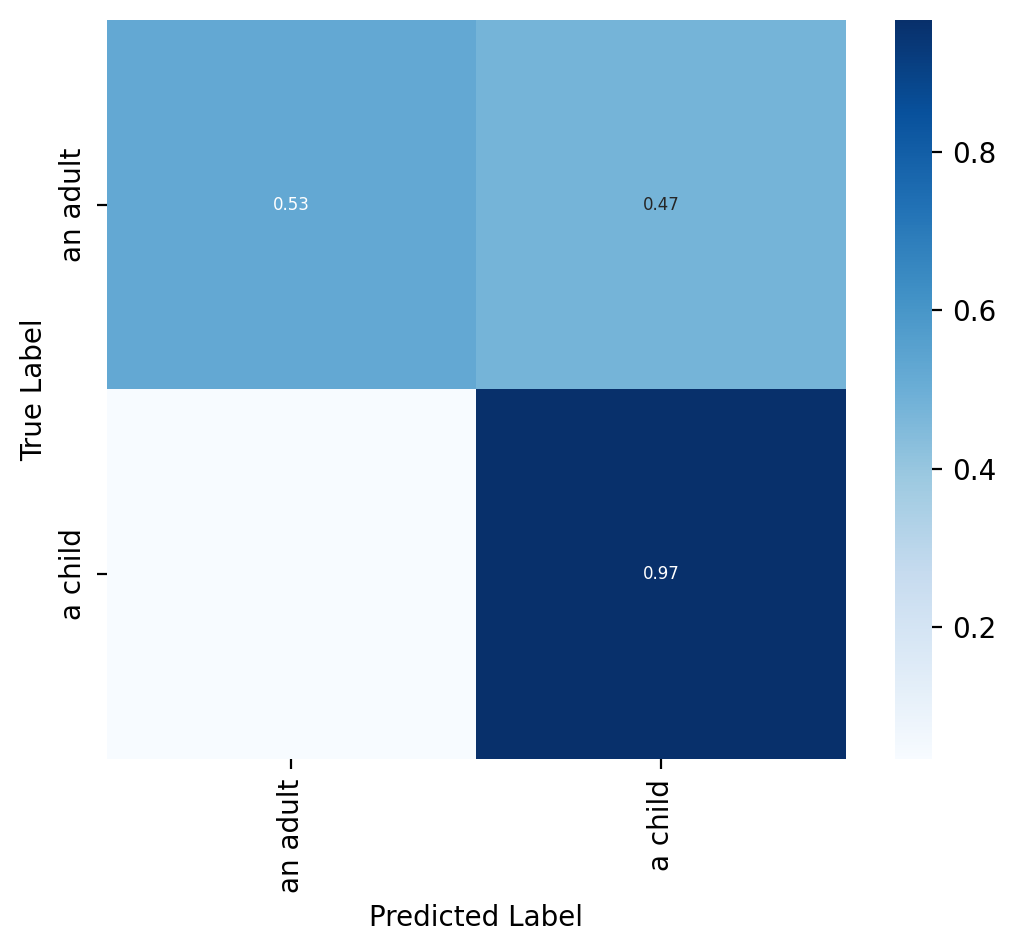

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# get confusion matrix
conf_matrix = confusion_matrix(y_label_val,y_pred_val)
conf_mat_norm_recall = conf_matrix.astype('float32')/conf_matrix.sum(axis=1)[:,np.newaxis]
recall_by_class = np.diagonal(conf_mat_norm_recall)
mean_recall = np.mean(recall_by_class)

# Calculate row sums to use for percentages
row_sums = conf_matrix.sum(axis=1)

# Calculate percentages
percentages = (conf_matrix.T / row_sums).T  # Transpose for division, then transpose back

# Format percentages as strings with '%' symbol
annot_data = [['{:.2f}'.format(val) for val in row] for row in percentages]
annot_data = [['' if float(val <= 0.04) else '{:.2f}'.format(val) for val in row] for row in percentages]

plt.figure(dpi=200)

annot_kws = {'size': 6}
ax = sns.heatmap(percentages, xticklabels=classes, yticklabels=classes, annot=annot_data, fmt='', square=True, cmap='Blues', annot_kws=annot_kws)
ax.set_xlabel('Predicted Label')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_ylabel('True Label')

#plt.subplots_adjust(left=0.2, bottom=0.35)
plt.show()

In [ ]:
/bucket/data_collection/datasets/web_free_data/source/youtube_children_podcasts_122023/meta.csv